In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
import seaborn as sns
%matplotlib inline

ny_off_2013_df= pd.read_csv('NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv')
print(ny_off_2013_df)

                           City Population Violent\ncrime  Murder Rape  \
0                 Adams Village      1,861              0       0    0   
1      Addison Town and Village      2,577              3       0    0   
2                 Akron Village      2,846              3       0    0   
3                        Albany     97,956            791       8   30   
4                Albion Village      6,388             23       0    3   
5                Alfred Village      4,089              5       0    0   
6              Allegany Village      1,781              3       0    0   
7                  Amherst Town    118,296            107       1    7   
8            Amityville Village      9,519              9       0    2   
9                     Amsterdam     18,182             30       0    0   
10               Arcade Village      2,053              0       0    0   
11              Ardsley Village      4,523              5       0    0   
12            Asharoken Village       

𝑃𝑟𝑜𝑝𝑒𝑟𝑡𝑦𝑐𝑟𝑖𝑚𝑒 = 𝛼 + 𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛 + 𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛2 + 𝑀𝑢𝑟𝑑𝑒𝑟 + 𝑅𝑜𝑏𝑏𝑒𝑟𝑦

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:



In [15]:
murder_binary=[]

for row in ny_off_2013_df['Murder']:
    if row >= 1:
        murder_binary.append('1')
    elif row == 0:
        murder_binary.append('0')
    #create a column based on this output
ny_off_2013_df['murder_binary'] = murder_binary

0      0
1      0
2      0
3      1
4      0
5      0
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     0
14     1
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
318    0
319    0
320    0
321    1
322    0
323    1
324    0
325    0
326    0
327    0
328    0
329    0
330    0
331    1
332    0
333    0
334    0
335    0
336    0
337    0
338    1
339    0
340    1
341    0
342    0
343    0
344    0
345    0
346    1
347    0
Name: murder_binary, Length: 348, dtype: object
0      0
1      0
2      0
3      8
4      0
5      0
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     0
14     1
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     3
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
318    0
319    0
320    0
321    7
322    0
323    1
324    0
325    0
326    0
327    0
328    0
329    0
330    0
331    

In [25]:
ny_off_2013_df['Population']=(ny_off_2013_df['Population']).str.replace(",", "")
ny_off_2013_df['Population']=(ny_off_2013_df['Population']).apply(pd.to_numeric)

ny_off_2013_df['population_squared']=(ny_off_2013_df['Population'])**2

In [26]:
ny_off_2013_df['Robbery']=(ny_off_2013_df['Robbery']).str.replace(",", "")
ny_off_2013_df['Robbery']=(ny_off_2013_df['Robbery']).apply(pd.to_numeric)

robbery_binary=[]

for row in ny_off_2013_df['Robbery']:
    if row >= 1:
        robbery_binary.append('1')
    elif row == 0:
        robbery_binary.append('0')
    #create a column based on this output
ny_off_2013_df['robbery_binary'] = robbery_binary

Text(0, 0.5, 'Population')

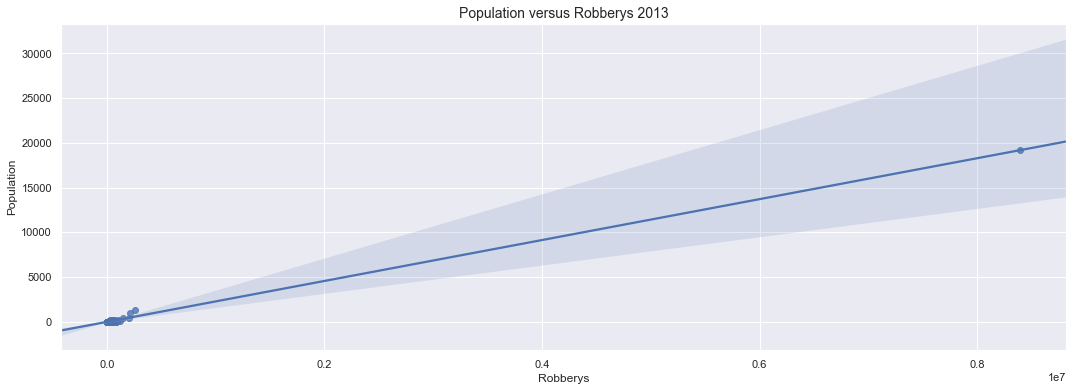

In [30]:
plt.figure(figsize=(18,6))


sns.set(style="darkgrid")
sns.regplot(ny_off_2013_df['Population'], ny_off_2013_df['Robbery'])
plt.title('Population versus Robberys 2013', fontsize=14)
plt.xlabel('Robberys')
plt.ylabel('Population')


Text(0, 0.5, 'Population')

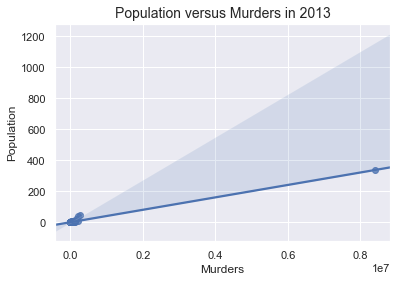

In [31]:
sns.set(style="darkgrid")
sns.regplot(ny_off_2013_df['Population'], ny_off_2013_df['Murder'])
plt.title('Population versus Murders in 2013', fontsize=14)
plt.xlabel('Murders')
plt.ylabel('Population')

One of these values seem to be for an area that is much bigger than the others. Hypothesize, it's Manhattan/Downtown New York...on further inspection that turns out to be the case. Opt to leave in for now. May consider removing for modelling later.